In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df=pd.read_csv("Advertising.csv",index_col=0)

In [3]:
df.head() # the amount is in thousands and on dollars

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.shape # therefore there are 200 rows and 4 colums ----> 3 featues and 1 target ----> (200,3 - input) (200,1 -- output)

(200, 4)

In [5]:
df.columns # this tells how what are the various means in which an organization spends its money on 

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# Now lets make it interesting by visualizing them 

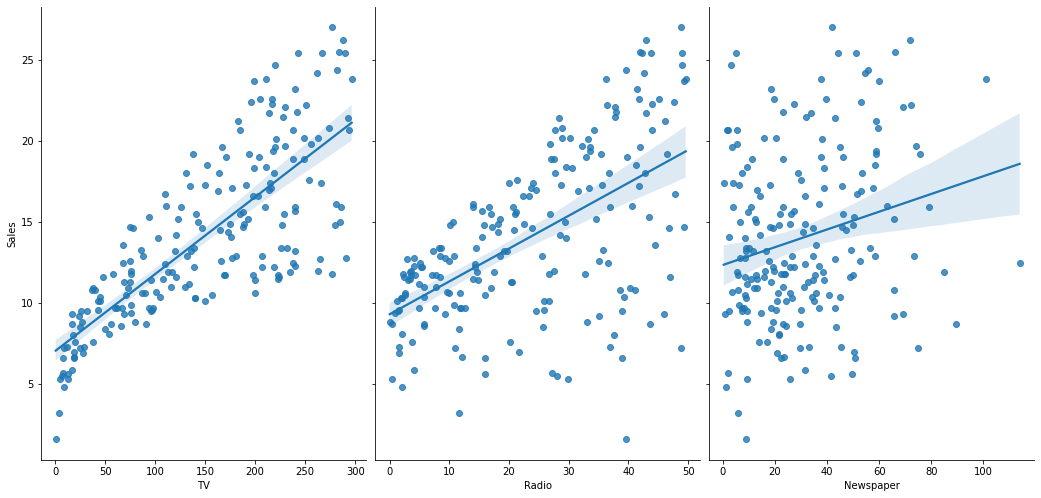

In [16]:
import seaborn as sns
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars=["Sales"],kind='reg',height=7,aspect=0.7)

In [17]:
# Lets seperate them as feature cols and target cols
feature_cols=["TV","Radio","Newspaper"]
X=df[feature_cols]

In [20]:
print(X)

        TV  Radio  Newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]


In [22]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [23]:
X.shape

(200, 3)

In [24]:
y=df["Sales"]

In [26]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [28]:
y.shape #means 200 rows and 1 columns

(200,)

In [38]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [41]:
# now lets fit linear regression
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [43]:
print(linreg.intercept_) #this is the bias

2.87696662231793


In [47]:
print(linreg.coef_)
#this shows that there is positive corelation because the co efficient values is coming as positive


[0.04656457 0.17915812 0.00345046]


In [49]:
list(zip(feature_cols,linreg.coef_)) # thsi shows that radio has more weightage and the  tv and last comes newspaper ----> this shows the importance of  the parameter

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

In [50]:
# Now lets make predictions
y_pred=linreg.predict(X_test)

In [53]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [54]:
# now lets implement the evaluation metrics
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred)) #Mean absolute error

10.0


In [55]:
print(metrics.mean_squared_error(true,pred)) # mean squared error

150.0


In [56]:
print(np.sqrt(metrics.mean_squared_error(true,pred))) #root mean squared error

12.24744871391589


In [57]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred))) #

1.404651423032895


In [58]:
# feature selection

In [59]:
feature_cols = ['TV', 'Radio']

X = df[feature_cols]

y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

# lets compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.3879034699382888


In [ ]:
# This shows that the error has been reduced by removing column 'newspaper' which leads to more error